Búsqueda de Videos

In [ ]:
# Install isodate library
#%pip install isodate

In [2]:
import pandas as pd
import isodate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [3]:
# Getting the path and the file from the data raw directory
ruta_archivo = os.path.join('..', "data", "raw", "youtube_comments_with_flags_and_replies.csv")
comentarios = pd.read_csv(ruta_archivo)

In [4]:
# Display the first few rows of the dataframe to confirm it loaded correctly
comentarios.head()

,comment_id,comment,user_id,user_name,comment_time,comment_likes,total_reply_count,is_top_level_comment,video_title,channel_title,video_published_at,video_views,video_likes,video_duration,relacion_evento,evento,tipo_evento,condiciones_cuenta
0,UgwZJGlfpFvs-r_l-hB4AaABAg,Esta vieja esta más loca cómo una cabra..😂😂😂,UC7s8hGLBfkLOzpho73qs4FQ,@siulenlo8728,2024-08-15T02:14:26Z,0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628428,23596,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
1,UgyEy8OvhoFZrm5GJdd4AaABAg,Cuanto tiempo?,UCAHJ7ysRA9VnBb7JsHBcYPQ,@Raul-bb3nc,2024-05-18T04:07:18Z,0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628428,23596,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
2,UgwHEuRpsRRYPMdUIgl4AaABAg,DEMENTE,UCpkOnRIXHKSxUTB_o670KUQ,@DanielaMagnetto,2024-05-10T15:27:31Z,0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628428,23596,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
3,UgxwuSoMHOuFhLJq6HR4AaABAg,Metete las remeras y los gorros en el Q lo 😂,UCpkOnRIXHKSxUTB_o670KUQ,@DanielaMagnetto,2024-05-10T15:11:56Z,0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628428,23596,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
4,UgycBcRrtu-sx9tHI-N4AaABAg,Que hermoso querido presidente.,UC3a1y33-3H-9J4MEq-fnh8g,@JojoRD-1023,2024-05-04T00:24:26Z,0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628428,23596,PT41M21S,No,Primer paro nacional,Desfavorable,A favor


In [5]:
# Convert 'total_reply_count' and 'video_likes' to numeric
comentarios['total_reply_count'] = pd.to_numeric(comentarios['total_reply_count'], errors='coerce')
comentarios['video_likes'] = pd.to_numeric(comentarios['video_likes'], errors='coerce')

In [6]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86549 entries, 0 to 86548
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   comment_id            86549 non-null  object
 1   comment               86549 non-null  object
 2   user_id               86549 non-null  object
 3   user_name             86472 non-null  object
 4   comment_time          86549 non-null  object
 5   comment_likes         86549 non-null  int64 
 6   total_reply_count     86549 non-null  int64 
 7   is_top_level_comment  86549 non-null  bool  
 8   video_title           86549 non-null  object
 9   channel_title         86549 non-null  object
 10  video_published_at    86549 non-null  object
 11  video_views           86549 non-null  int64 
 12  video_likes           86549 non-null  int64 
 13  video_duration        86549 non-null  object
 14  relacion_evento       86549 non-null  object
 15  evento                86549 non-null

In [7]:
# Remove rows where 'user_id' is null
comentarios_cleaned = comentarios.dropna(subset=['user_id'])

In [8]:
# Define a function to convert ISO 8601 duration to a timedelta
def convert_iso8601_to_timedelta(iso_duration):
    return isodate.parse_duration(iso_duration)

In [10]:
# Ensure that the DataFrame is not a view of another DataFrame
comentarios_filtered_time = comentarios_cleaned.copy()

# Convert the 'video_duration' column
comentarios_filtered_time.loc[:, 'duration_timedelta'] = comentarios_filtered_time['video_duration'].apply(convert_iso8601_to_timedelta)

# Convert the timedelta to total seconds (or any other format you prefer)
comentarios_filtered_time.loc[:, 'duration_seconds'] = comentarios_filtered_time['duration_timedelta'].apply(lambda x: x.total_seconds())

# Delete the original 'video_duration' column
comentarios_filtered_time.drop(columns=['video_duration'], inplace=True)


In [11]:
# Convert 'comment_time' and 'video_published_at' to datetime
comentarios_filtered_time['comment_time'] = pd.to_datetime(comentarios_filtered_time['comment_time'])
comentarios_filtered_time['video_published_at'] = pd.to_datetime(comentarios_filtered_time['video_published_at'])


In [12]:
# Relative destination for all the notebooks
directorio_destino = os.path.join('..', "data", "raw")
archivo_csv = os.path.join(directorio_destino, 'youtube_comments_with_cleaned_ts.csv')

# Saving the combined DataFrame to a CSV file with UTF-8 encoding
comentarios_filtered_time.to_csv(archivo_csv, index=False, encoding='utf-8')

In [94]:
comentarios_filtered_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86549 entries, 0 to 86548
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   comment_id            86549 non-null  object             
 1   comment               86549 non-null  object             
 2   user_id               86549 non-null  object             
 3   user_name             86472 non-null  object             
 4   comment_time          86549 non-null  datetime64[ns, UTC]
 5   comment_likes         86549 non-null  int64              
 6   total_reply_count     86549 non-null  int64              
 7   is_top_level_comment  86549 non-null  bool               
 8   video_title           86549 non-null  object             
 9   channel_title         86549 non-null  object             
 10  video_published_at    86549 non-null  datetime64[ns, UTC]
 11  video_views           86549 non-null  int64              
 12  vide

In [93]:
comentarios_filtered_time.describe()

,comment_likes,total_reply_count,video_views,video_likes,duration_timedelta,duration_seconds
count,86549.000000,86549.000000,86549.000000,86549.000000,86549,86549.000000
mean,5.873702,0.374793,226396.459266,9925.305653,0 days 00:32:30.674565852,1950.674566
std,34.840874,3.165036,219459.347322,10430.379075,0 days 00:28:15.029411111,1695.029411
min,0.000000,0.000000,867.000000,20.000000,0 days 00:00:32,32.000000
25%,0.000000,0.000000,39357.000000,1383.000000,0 days 00:08:51,531.000000
50%,0.000000,0.000000,115979.000000,5445.000000,0 days 00:37:07,2227.000000
75%,1.000000,0.000000,370405.000000,18958.000000,0 days 00:53:43,3223.000000
max,2355.000000,333.000000,628428.000000,34327.000000,0 days 03:24:25,12265.000000


In [91]:
distinct_counts = pd.DataFrame({
    'Comentarios Unicos': comentarios_filtered_time['comment_id'].nunique(),
    'Usuarios Unicos': comentarios_filtered_time['user_id'].nunique(),
    'Videos': comentarios_filtered_time['video_title'].nunique(),
    'Eventos Relacionados': comentarios_filtered_time['evento'].nunique(),
    'Canales': comentarios_filtered_time['channel_title'].nunique()
}, index=[0])

# Display the counts
distinct_counts

,Comentarios Unicos,Usuarios Unicos,Videos,Eventos Relacionados,Canales
0,86531,46184,214,12,7


In [38]:
# Grouping by video_title and channel_title and counting comments
comments_by_video = comentarios_filtered_time.groupby(['video_title', 'channel_title', 'evento']).size().reset_index(name='conteo_comentarios')


In [39]:
comments_by_video_ordered = comments_by_video.sort_values(by='conteo_comentarios', ascending=False)
comments_by_video_ordered.head(10)

,video_title,channel_title,evento,conteo_comentarios
102,MILEI DESTROZÓ A LA MUJER DEL PRESIDENTE EN ES...,El Peluca Milei,Crisis diplomatica España,6741
118,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,Primer paro nacional,5242
106,MILEI ESTALLÓ EN ESPAÑA EN PLENA PRESENTACIÓN ...,El Peluca Milei,Crisis diplomatica España,3321
26,CONCIERTO HISTÓRICO DE MILEI ANTE UN ESTADIO C...,El Peluca Milei,Presentación de libro,2801
107,MILEI ESTALLÓ ESPAÑA EN PLENA ENTREGA DE PREMIO,El Peluca Milei,20 de junio,2649
103,MILEI DIO EL DISCURSO DE SU VIDA ANTE TODOS EM...,El Peluca Milei,24 de marzo,2647
101,MILEI A LOS GRITOS EN MITRE TRAS EL ESCÁNDALO ...,El Peluca Milei,Crisis alimentos Capital Humano,2348
112,MILEI LE CERRÓ LA BOCA A PERIODISTA QUE LE CUE...,El Peluca Milei,Aprobación total Ley bases,2277
127,"Milei, tras la aprobación de la Ley Bases: ""E...",LA NACION,Aprobación total Ley bases,2056
108,MILEI EXPLOTÓ CON PERIODISTA YANKEE EN PLENA E...,El Peluca Milei,Reunion con Elon Musk,1697


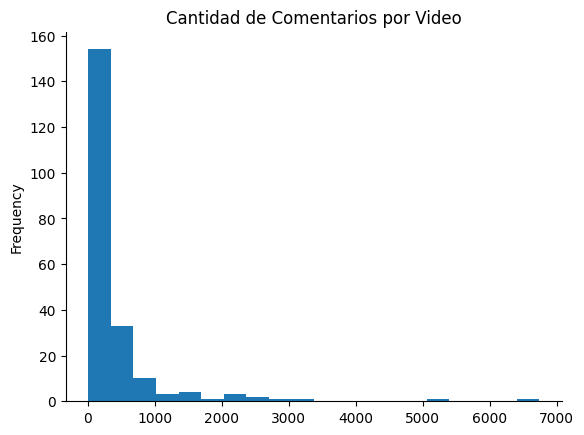

In [40]:
comments_by_video['conteo_comentarios'].plot(kind='hist', bins=20, title='Cantidad de Comentarios por Video')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
comments_by_channel = comentarios_filtered_time.groupby('channel_title').size().reset_index(name='conteo_comentarios')
comments_by_channel

,channel_title,conteo_comentarios
0,El Destape,10340
1,El Peluca Milei,35061
2,Infobae,73
3,LA NACION,16608
4,Pais De Boludos,2851
5,Revolución Popular Noticias,17261
6,Urgente Milei,4355


In [42]:
comments_by_event_type = comentarios_filtered_time.groupby('tipo_evento').size().reset_index(name='conteo_comentarios')
comments_by_event_type

,tipo_evento,conteo_comentarios
0,Desfavorable,51170
1,Favorable,22376
2,Neutral,13003


In [43]:
comments_by_event = comentarios_filtered_time.groupby(['tipo_evento', 'evento']).size().reset_index(name='conteo_comentarios')
comments_by_event_ordered = comments_by_event.sort_values(by='conteo_comentarios', ascending=False)
comments_by_event_ordered

,tipo_evento,evento,conteo_comentarios
1,Desfavorable,Crisis diplomatica España,13617
0,Desfavorable,Crisis alimentos Capital Humano,12955
3,Desfavorable,Primer paro nacional,12314
2,Desfavorable,Marcha federal universitaria,12284
4,Favorable,Aprobación total Ley bases,10901
6,Favorable,Presentación de libro,7834
9,Neutral,24 de marzo,4931
10,Neutral,25 de mayo,4091
8,Neutral,20 de junio,3395
7,Favorable,Reunion con Elon Musk,2953


In [44]:
comments_by_user = comentarios_filtered_time.groupby(['user_name', 'user_id']).size().reset_index(name='conteo_comentarios')
comments_by_user_ordered = comments_by_user.sort_values(by='conteo_comentarios', ascending=False)
comments_by_user_ordered.head(20)

,user_name,user_id,conteo_comentarios
21275,@guybrushtreepwood2222,UCgVPTK68WIDP0da35S7UNiA,230
11183,@baltojuniorwolfer3662,UCEzdl0dzAKWsdrntNQep-Lw,94
14956,@daphnyhealoregon2596,UCvepJg-HHV0Ev9m3sLPNpIA,86
26841,@leonardoiglesias2394,UCKBW-hWuHxF-DBsnCtFmToQ,75
5789,@PabloPerez-ed9gp,UClR0bbvHrDGQHRjtiMfhXKw,75
6372,@RoseRoses-ne2kr,UCjmMhpWTNotA9lcj1t39YBA,74
29564,@marcosgonzalez1611,UC1njhKhr6dNrH0VKaQ5qaaA,73
16318,@eduardouncos1508,UC4XnpYtpqWlv1mLfxUY4dgg,72
20400,@gonzalo1132,UCIyMSvejoJXiytrn3Ww3hyA,70
7756,@adrianadiaz3124,UCyhFDiVzgM73JGdtze8g1Fw,69


In [45]:
# Group by user_id and count the number of comments
comments_by_user = comentarios_filtered_time.groupby('user_id').size().reset_index(name='conteo_comentarios')

# Calcular el percentil 99 (es decir, el 1% de los usuarios con más comentarios)
percentil_999 = np.percentile(comments_by_user['conteo_comentarios'], 99.9)

# Filtrar los usuarios que están por encima del percentil 99 (los "outliers")
outliers = comments_by_user[comments_by_user['conteo_comentarios'] > percentil_999]

# Calcular el total de comentarios
total_comentarios = comments_by_user['conteo_comentarios'].sum()

# Calcular el total de comentarios de los outliers
total_outliers_comentarios = outliers['conteo_comentarios'].sum()

# Calcular el porcentaje de comentarios de los outliers
porcentaje_outliers = (total_outliers_comentarios / total_comentarios) * 100


# Mostrar cuántos usuarios son considerados outliers
print(f"Usuarios que se consideran como outliers (el 0,1% con más comentarios): {len(outliers)}")
print(f"Umbral de comentarios para ser considerados outliers: {percentil_999}")
print(f"El {porcentaje_outliers:.2f}% de los comentarios provienen de los {len(outliers)} usuarios más activos (outliers).")




Usuarios que se consideran como outliers (el 0,1% con más comentarios): 46
Umbral de comentarios para ser considerados outliers: 32.0
El 2.91% de los comentarios provienen de los 46 usuarios más activos (outliers).


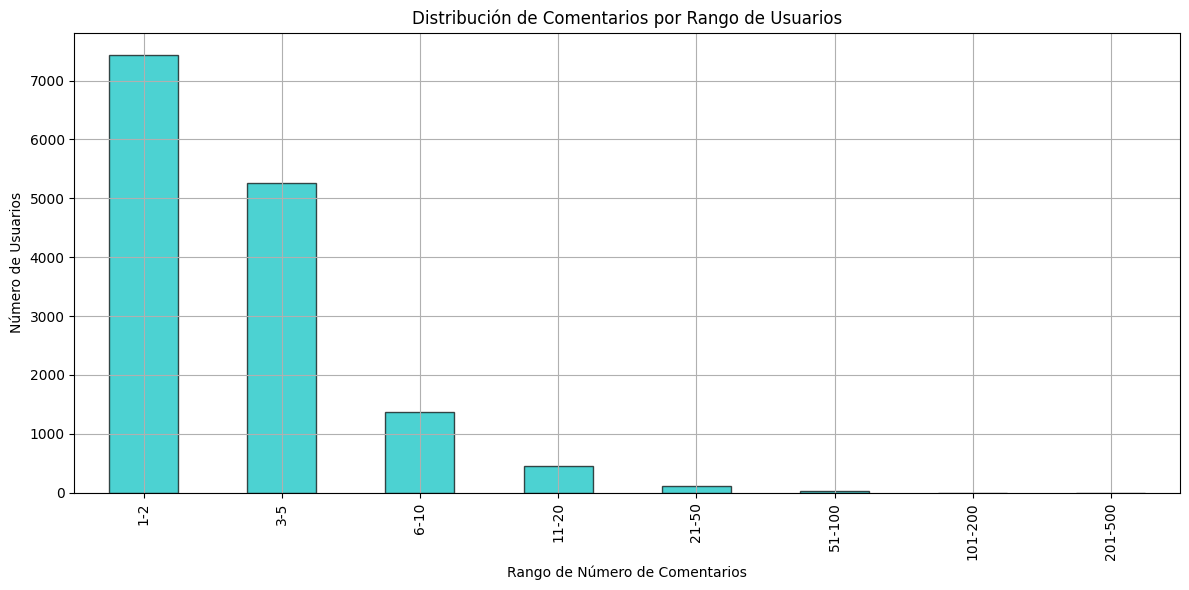

In [46]:
# Agrupar usuarios en rangos de comentarios
bins = [1, 2, 5, 10, 20, 50, 100, 200, 500]
labels = ['1-2', '3-5', '6-10', '11-20', '21-50', '51-100', '101-200', '201-500']

# Crear una nueva columna con los rangos
comments_by_user['range'] = pd.cut(comments_by_user['conteo_comentarios'], bins=bins, labels=labels)

# Contar cuántos usuarios hay en cada rango
comments_by_user_grouped = comments_by_user['range'].value_counts().sort_index()

# Graficar la distribución de comentarios por rango
plt.figure(figsize=(12, 6))
comments_by_user_grouped.plot(kind='bar', color='c', edgecolor='black', alpha=0.7)

# Títulos y etiquetas
plt.title('Distribución de Comentarios por Rango de Usuarios')
plt.xlabel('Rango de Número de Comentarios')
plt.ylabel('Número de Usuarios')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
repeated_comments = comentarios_filtered_time.groupby('comment').size().reset_index(name='conteo_comentarios')

repeated_comments_ordered = repeated_comments.sort_values(by='conteo_comentarios', ascending=False)
repeated_comments_ordered.head(10)

,comment,conteo_comentarios
81221,❤,126
81375,❤❤❤,57
82655,😂😂😂,54
82509,😂,50
68633,VLLC,47
82777,😂😂😂😂,44
81412,❤❤❤❤,38
25793,Excelente,33
82898,😂😂😂😂😂😂,31
82101,👏👏👏,31


In [48]:
# Define a function to filter out comments that are just emojis or single words
def filter_comments(comment):
    # Check if the comment is a single word
    if len(comment.split()) <= 1:
        # Check if the single word is an emoji (emojis are typically unicode characters beyond the Basic Multilingual Plane)
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)
        if emoji_pattern.match(comment):
            return False
        else:
            return False
    return True

# Filter the DataFrame
filtered_df = comentarios_filtered_time[comentarios_filtered_time['comment'].apply(filter_comments)]

# Group by comment to count occurrences
repeated_comments = filtered_df.groupby('comment').size().reset_index(name='conteo_comentarios')

# Sort by comment_count in descending order
repeated_comments_ordered = repeated_comments.sort_values(by='conteo_comentarios', ascending=False)

# Display the top 20 comments
repeated_comments_ordered.head(20)

,comment,conteo_comentarios
69712,Viva la libertad carajo,31
948,"<a href=""http://www.youtube.com/results?search...",30
29386,Grande Milei,25
57409,RESOLVE LA INSEGURIDAD PELOUDO NO TE VALLAS A ...,17
69654,Viva la libertad,15
75520,para mi es un payaso hablan tantp de los rojos...,15
12827,Cristina no vuelve nunca mas ya fue!!!!,14
33205,Jhon Perkins confesiones de un Ganster Econòmi...,14
67221,VIVA LA LIBERTAD CARAJO,13
946,"<a href=""http://www.youtube.com/results?search...",12


In [70]:
def calculate_users_with_multiple_comments_per_video(df):
    grouped = df.groupby(['channel_title', 'video_title', 'user_id']).size().reset_index(name='conteo_comentarios')
    multiple_comments = grouped[grouped['conteo_comentarios'] > 1]
    percentage = multiple_comments.groupby('channel_title')['user_id'].nunique() / df.groupby('channel_title')['user_id'].nunique() * 100
    # Redondear a 1 decimal
    percentage = percentage.round(1)
    # Convertir a porcentaje con un solo decimal
    return percentage.reset_index(name='% de Usuarios con más de un comentario')

# Load the dataframe
df = comentarios_filtered_time

# Calculate the metric
users_with_multiple_comments_per_video = calculate_users_with_multiple_comments_per_video(df)

# Display the result as a table
users_with_multiple_comments_per_video


,channel_title,% de Usuarios con más de un comentario
0,El Destape,21.8
1,El Peluca Milei,17.1
2,Infobae,21.2
3,LA NACION,22.2
4,Pais De Boludos,14.0
5,Revolución Popular Noticias,19.4
6,Urgente Milei,12.3


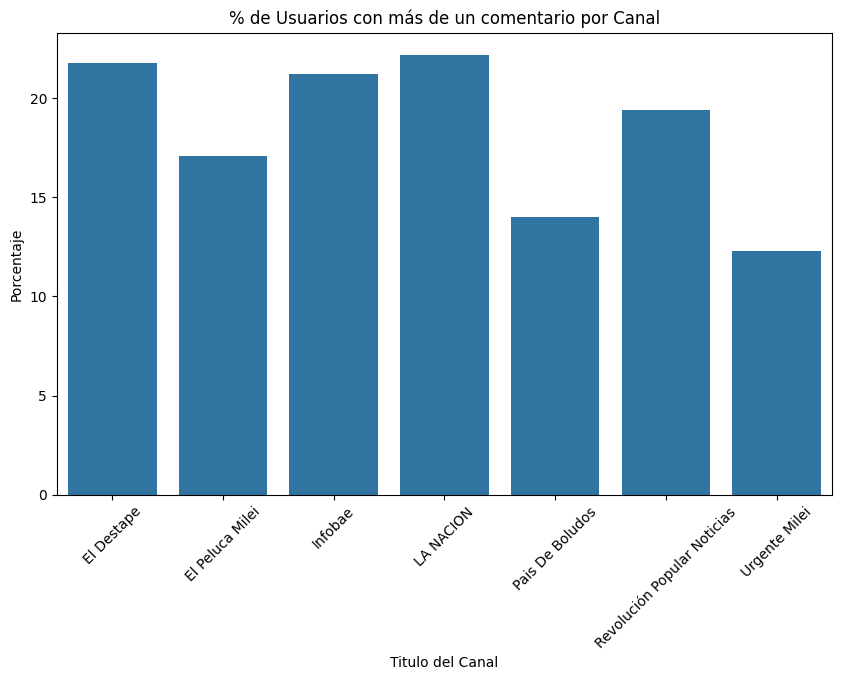

In [74]:
def plot_users_with_multiple_comments_per_video(data):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='channel_title', y='% de Usuarios con más de un comentario', data=data)
    plt.title('% de Usuarios con más de un comentario por Canal')
    plt.xlabel('Titulo del Canal')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)
    plt.show()

# Plot the visualization
plot_users_with_multiple_comments_per_video(users_with_multiple_comments_per_video)


In [75]:
def calculate_users_with_multiple_comments_per_video(df):
    grouped = df.groupby(['channel_title', 'video_title', 'user_id', 'is_top_level_comment']).size().reset_index(name='comment_count')
    multiple_comments = grouped[grouped['comment_count'] > 1]
    percentage = multiple_comments.groupby(['channel_title', 'is_top_level_comment'])['user_id'].nunique() / df.groupby(['channel_title', 'is_top_level_comment'])['user_id'].nunique() * 100
    percentage = percentage.round(1)
    return percentage.reset_index(name='%_usuarios_con_multiples_comentarios_por_video')

# Load the dataframe
df = comentarios_filtered_time

# Calculate the metric
users_with_multiple_comments_per_video = calculate_users_with_multiple_comments_per_video(df)

users_with_multiple_comments_per_video


,channel_title,is_top_level_comment,%_usuarios_con_multiples_comentarios_por_video
0,El Destape,False,33.6
1,El Destape,True,13.0
2,El Peluca Milei,False,27.4
3,El Peluca Milei,True,11.9
4,Infobae,False,38.9
5,Infobae,True,7.7
6,LA NACION,False,32.9
7,LA NACION,True,12.4
8,Pais De Boludos,False,30.2
9,Pais De Boludos,True,7.1


is_top_level_comment equivale a los comentarios que son del video y están dentro de un hilo. Observamos que en todos los casos los comentarios repetidos tienen mayor incidencia en los hilos que tiene sentido al representar el debate de los usuarios.

#### Usuarios con comentarios en más de un video

In [76]:
def calculate_users_videos_distribution(df):
    # Group by user_id to count distinct videos commented
    video_counts = df.groupby('user_id')['video_title'].nunique().reset_index(name='video_count')
    # Count the number of users for each unique video count
    video_distribution = video_counts['video_count'].value_counts().reset_index()
    video_distribution.columns = ['Cantidad de Videos Comentados', 'Cantidad Usuarios']
    # Calculate the percentage of total users for each unique video count
    video_distribution['% del Total de Usuarios'] = (video_distribution['Cantidad Usuarios'] / video_counts.shape[0]) * 100
    # Redondear a 1 decimal
    video_distribution['% del Total de Usuarios'] = video_distribution['% del Total de Usuarios'].round(1)
    return video_distribution

# Calculate the metric
video_distribution = calculate_users_videos_distribution(df)

# Display the result as a table
video_distribution.head(10)

,Cantidad de Videos Comentados,Cantidad Usuarios,% del Total de Usuarios
0,1,36528,79.1
1,2,5863,12.7
2,3,1916,4.1
3,4,807,1.7
4,5,394,0.9
5,6,219,0.5
6,7,150,0.3
7,8,93,0.2
8,9,55,0.1
9,10,47,0.1


In [77]:
def calculate_users_with_multiple_videos_commented(df):
    grouped = df.groupby(['channel_title', 'user_id'])['video_title'].nunique().reset_index(name='video_count')
    multiple_videos = grouped[grouped['video_count'] > 1]
    percentage = multiple_videos.groupby('channel_title')['user_id'].nunique() / df.groupby('channel_title')['user_id'].nunique() * 100
    percentage = percentage.round(1)
    return percentage.reset_index(name='% de Usuarios con multiples videos comentados')

# Calculate the metric
users_with_multiple_videos_commented = calculate_users_with_multiple_videos_commented(df)

# Display the result as a table
users_with_multiple_videos_commented


,channel_title,% de Usuarios con multiples videos comentados
0,El Destape,17.0
1,El Peluca Milei,12.2
2,Infobae,NaN
3,LA NACION,11.7
4,Pais De Boludos,17.9
5,Revolución Popular Noticias,27.0
6,Urgente Milei,7.8


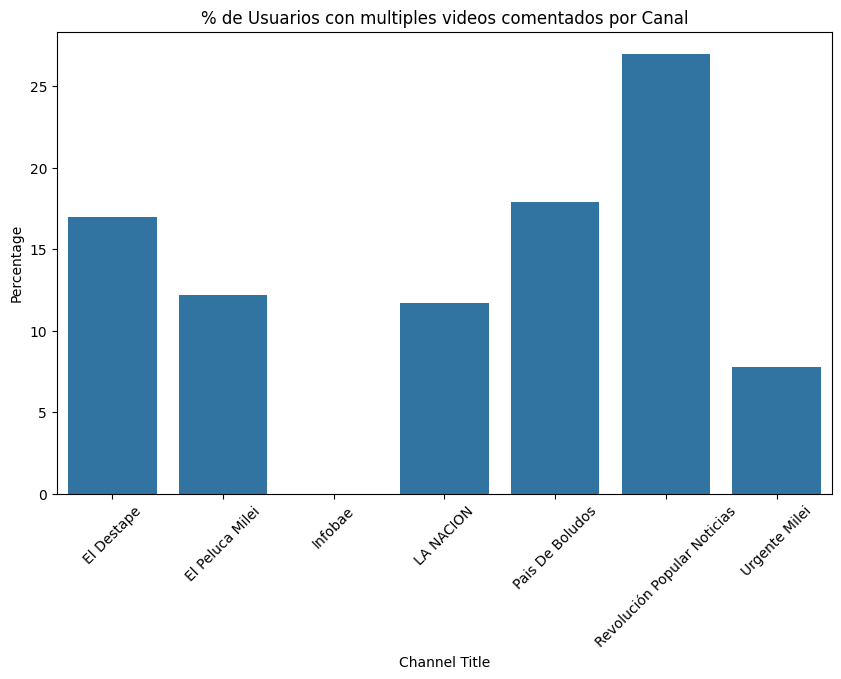

In [79]:
def plot_users_with_multiple_videos_commented(data):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='channel_title', y='% de Usuarios con multiples videos comentados', data=data)
    plt.title('% de Usuarios con multiples videos comentados por Canal')
    plt.xlabel('Channel Title')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()

# Plot the visualization
plot_users_with_multiple_videos_commented(users_with_multiple_videos_commented)


#### Usuarios con comentarios en más de un Canal

In [83]:
def calculate_users_channels_distribution(df):
    # Group by user_id to count distinct channels commented
    channel_counts = df.groupby('user_id')['channel_title'].nunique().reset_index(name='channel_count')
    # Count the number of users for each unique channel count
    channel_distribution = channel_counts['channel_count'].value_counts().reset_index()
    channel_distribution.columns = ['Cantidad de Canales Comentados', 'Total Usuarios']
    # Calculate the percentage of total users for each unique channel count
    channel_distribution['% de Total de Usuarios'] = (channel_distribution['Total Usuarios'] / channel_counts.shape[0]) * 100
    channel_distribution = channel_distribution.round(1)
    return channel_distribution

# Calculate the metric
channel_distribution = calculate_users_channels_distribution(df)

# Display the result as a table
channel_distribution


,Cantidad de Canales Comentados,Total Usuarios,% de Total de Usuarios
0,1,41309,89.4
1,2,4170,9.0
2,3,625,1.4
3,4,68,0.1
4,5,12,0.0


In [84]:
# Group by date for comments
comments_by_date = comentarios_filtered_time.groupby(comentarios_filtered_time['comment_time'].dt.date).size()

# Group by date for video publications
publications_by_date = comentarios_filtered_time.groupby(comentarios_filtered_time['video_published_at'].dt.date).size()


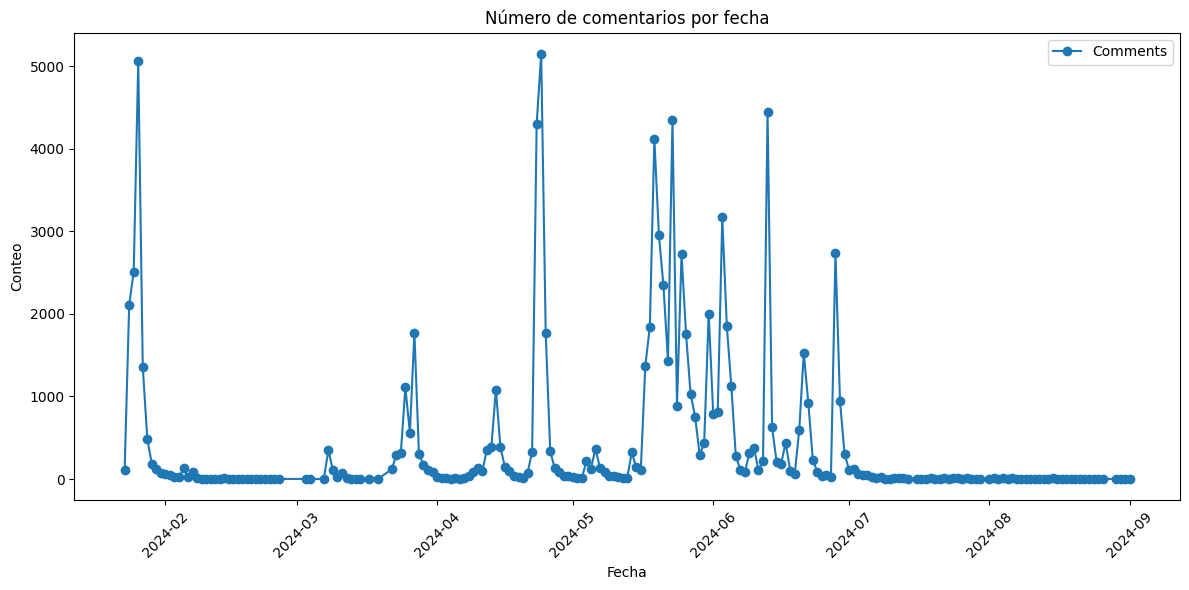

In [86]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(comments_by_date.index, comments_by_date.values, label='Comments', marker='o')
#plt.plot(publications_by_date.index, publications_by_date.values, label='Publications', marker='s')

plt.title('Número de comentarios por fecha')
plt.xlabel('Fecha')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

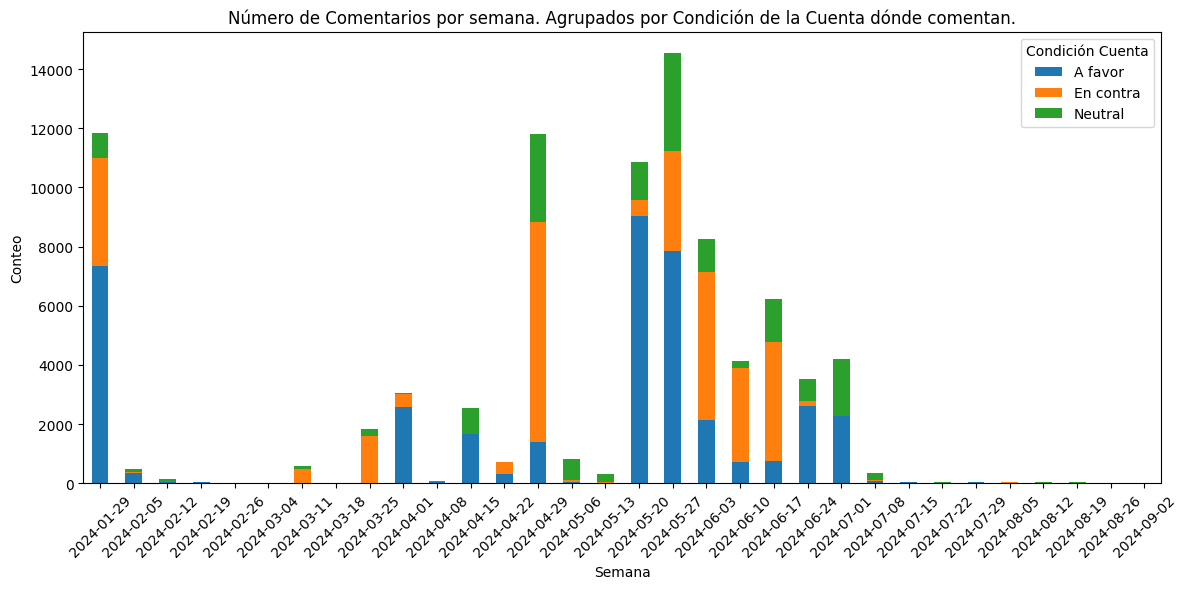

In [88]:
# Group by week and condiciones_cuenta
comments_by_week_and_condition = comentarios_filtered_time.groupby([pd.Grouper(key='comment_time', freq='W-MON'), 'condiciones_cuenta']).size().reset_index(name='count')

# Format the week dates to show only the day part
comments_by_week_and_condition['comment_time'] = comments_by_week_and_condition['comment_time'].dt.strftime('%Y-%m-%d')

# Pivot the data to have condiciones_cuenta as columns
pivot_table = comments_by_week_and_condition.pivot(index='comment_time', columns='condiciones_cuenta', values='count').fillna(0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Número de Comentarios por semana. Agrupados por Condición de la Cuenta dónde comentan.')
plt.xlabel('Semana')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.legend(title='Condición Cuenta')

plt.tight_layout()
plt.show()